# **Classifier tester**

Test one or more classifier models against held-out dataset. <br>
Using held-out test features, evaluates the peformance of the estimated model.<br>
Can be part of a kubeflow pipeline as a test step that is run post EDA and
training/validation cycles.<br>
This function is part of the [sklearn-project demo](https://github.com/mlrun/demos/tree/master/scikit-learn-pipeline).<br>
To see how the model is trained or how the data-set is generated, check out `sklearn_classifier` function from the function marketplace repository

### **Steps**

1. [Setup function parameters](#Setup-function-parameters)
2. [Importing the function](#Importing-the-function)
3. [Running the function locally](#Running-the-function-locally)
4. [Running the function remotely](#Running-the-function-remotely)

In [1]:
import warnings
warnings.filterwarnings("ignore")

### **Setup function parameters**

In [2]:
data_path  = 'https://s3.wasabisys.com/iguazio/data/function-marketplace-data/sklearn_classifier/iris_dataset.csv'
MODEL_PATH = 'https://s3.wasabisys.com/iguazio/models/iris/model.pkl'
random_forst_classifier = 'https://s3.wasabisys.com/iguazio/models/function-marketplace-models/test_classifier/RandomForestClassifier.pkl'
logistic_regression = 'https://s3.wasabisys.com/iguazio/models/function-marketplace-models/test_classifier/LogisticRegression.pkl'
adaboost_classifier = 'https://s3.wasabisys.com/iguazio/models/function-marketplace-models/test_classifier/AdaBoostClassifier.pkl'

models = {"RandomForestClassifier": random_forst_classifier, 
           "LogisticRegression": logistic_regression,
           "AdaBoostClassifier": adaboost_classifier}

### **Importing the function**

In [3]:
import mlrun
mlrun.set_environment(project='function-marketplace')

fn = mlrun.import_function('hub://test_classifier')
fn.apply(mlrun.auto_mount())

> 2021-10-17 13:21:22,393 [info] loaded project function-marketplace from MLRun DB


### **Running the function locally**

> 2021-10-17 13:21:22,868 [info] starting run RandomForestClassifier uid=e9303cf9952e43569766bea2ad73ce21 DB=http://mlrun-api:8080


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...ad73ce21,0,Oct 17 13:21:23,completed,RandomForestClassifier,v3io_user=danikind=owner=danihost=jupyter-dani-6bfbd76d96-zxx6f,test_setmodels_path,label_column=labelmodel_update=False,accuracy=0.9733333333333334test-error=0.02666666666666667auc-micro=0.9967111111111111auc-weighted=0.9969666666666666f1-score=0.9732905982905983precision_score=0.9753086419753086recall_score=0.9733333333333333,confusion-matrixfeature-importancesprecision-recall-multiclassroc-multiclasstest_set_preds


> 2021-10-17 13:21:26,833 [info] run executed, status=completed
> 2021-10-17 13:21:26,836 [info] starting run LogisticRegression uid=5e2cafe2183546caa93ab92a3b1171b8 DB=http://mlrun-api:8080


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...3b1171b8,0,Oct 17 13:21:26,completed,LogisticRegression,v3io_user=danikind=owner=danihost=jupyter-dani-6bfbd76d96-zxx6f,test_setmodels_path,label_column=labelmodel_update=False,accuracy=0.8533333333333334test-error=0.14666666666666667auc-micro=0.9745111111111111auc-weighted=0.9896f1-score=0.8458736163654197precision_score=0.8981481481481483recall_score=0.8533333333333334,confusion-matrixprecision-recall-multiclassroc-multiclasstest_set_preds


> 2021-10-17 13:21:28,722 [info] run executed, status=completed
> 2021-10-17 13:21:28,724 [info] starting run AdaBoostClassifier uid=ba75725d33be4197b24035c1f6194798 DB=http://mlrun-api:8080


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...f6194798,0,Oct 17 13:21:28,completed,AdaBoostClassifier,v3io_user=danikind=owner=danihost=jupyter-dani-6bfbd76d96-zxx6f,test_setmodels_path,label_column=labelmodel_update=False,accuracy=0.9533333333333334test-error=0.04666666666666667auc-micro=0.9892888888888888auc-weighted=0.9940666666666668f1-score=0.9533286661999534precision_score=0.9534480458850206recall_score=0.9533333333333333,confusion-matrixfeature-importancesprecision-recall-multiclassroc-multiclasstest_set_preds


> 2021-10-17 13:21:31,795 [info] run executed, status=completed


<Figure size 432x288 with 0 Axes>

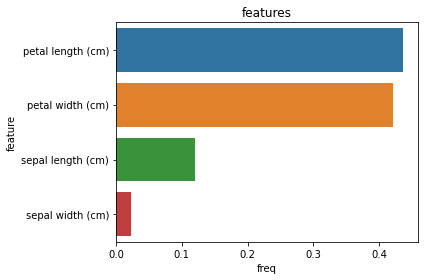

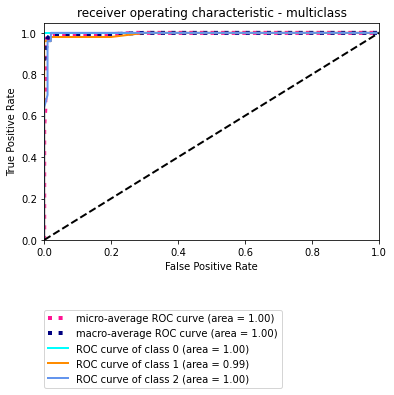

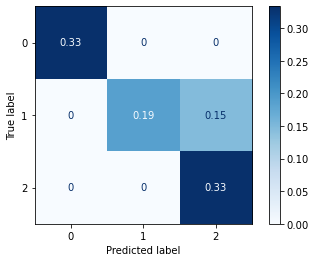

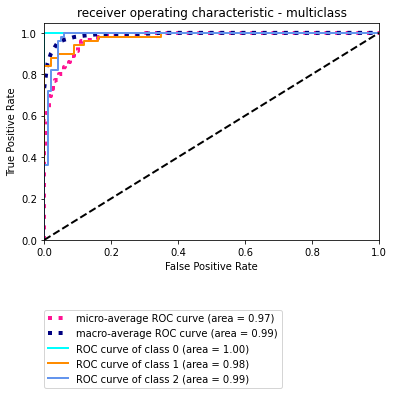

<Figure size 432x288 with 0 Axes>

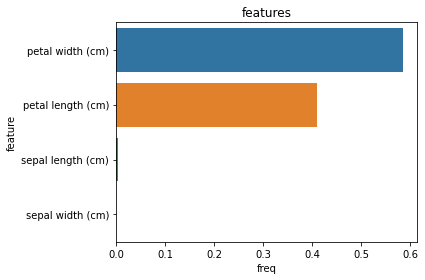

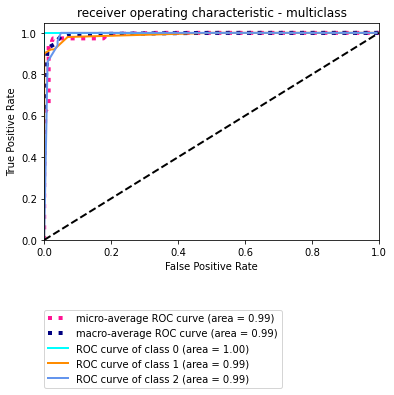

In [4]:
outputs = []
for key,value in models.items():
    output = fn.run(name=key,
                    params = {'label_column':'label',
                              'model_update': False},
                    inputs={'test_set': data_path,
                            'models_path': value},
                    local=True)
    outputs.append(output.outputs)

### **Running the function remotely**

In [5]:
outputs = []
for key,value in models.items():
    output = fn.run(name=key,
                    params = {'label_column':'label',
                              'model_update': False},
                    inputs={'test_set': data_path,
                            'models_path': value},
                    local=False)
    outputs.append(output.outputs)

> 2021-10-17 13:21:32,548 [info] starting run RandomForestClassifier uid=780bf36bc67047fa86eb1ff678358ad3 DB=http://mlrun-api:8080
> 2021-10-17 13:21:32,684 [info] Job is running in the background, pod: randomforestclassifier-6lc52
> 2021-10-17 13:21:41,814 [info] run executed, status=completed
final state: completed


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...78358ad3,0,Oct 17 13:21:38,completed,RandomForestClassifier,v3io_user=danikind=jobowner=danihost=randomforestclassifier-6lc52,test_setmodels_path,label_column=labelmodel_update=False,accuracy=0.9733333333333334test-error=0.02666666666666667auc-micro=0.9967111111111111auc-weighted=0.9969666666666666f1-score=0.9732905982905983precision_score=0.9753086419753086recall_score=0.9733333333333333,confusion-matrixfeature-importancesprecision-recall-multiclassroc-multiclasstest_set_preds


> 2021-10-17 13:21:41,884 [info] run executed, status=completed
> 2021-10-17 13:21:41,885 [info] starting run LogisticRegression uid=8c3492f3b19b46cda49a09476c64b20d DB=http://mlrun-api:8080
> 2021-10-17 13:21:42,005 [info] Job is running in the background, pod: logisticregression-cgpj7
> 2021-10-17 13:21:50,944 [info] run executed, status=completed
final state: completed


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...6c64b20d,0,Oct 17 13:21:48,completed,LogisticRegression,v3io_user=danikind=jobowner=danihost=logisticregression-cgpj7,test_setmodels_path,label_column=labelmodel_update=False,accuracy=0.8533333333333334test-error=0.14666666666666667auc-micro=0.9745111111111111auc-weighted=0.9896f1-score=0.8458736163654197precision_score=0.8981481481481483recall_score=0.8533333333333334,confusion-matrixprecision-recall-multiclassroc-multiclasstest_set_preds


> 2021-10-17 13:21:51,193 [info] run executed, status=completed
> 2021-10-17 13:21:51,194 [info] starting run AdaBoostClassifier uid=7c9ace5df35b4083b740580dce1f57d5 DB=http://mlrun-api:8080
> 2021-10-17 13:21:51,321 [info] Job is running in the background, pod: adaboostclassifier-zzcll
> 2021-10-17 13:22:01,107 [info] run executed, status=completed
final state: completed


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...ce1f57d5,0,Oct 17 13:21:57,completed,AdaBoostClassifier,v3io_user=danikind=jobowner=danihost=adaboostclassifier-zzcll,test_setmodels_path,label_column=labelmodel_update=False,accuracy=0.9533333333333334test-error=0.04666666666666667auc-micro=0.9892888888888888auc-weighted=0.9940666666666668f1-score=0.9533286661999534precision_score=0.9534480458850206recall_score=0.9533333333333333,confusion-matrixfeature-importancesprecision-recall-multiclassroc-multiclasstest_set_preds


> 2021-10-17 13:22:10,594 [info] run executed, status=completed


In [6]:
outputs

[{'accuracy': 0.9733333333333334,
  'test-error': 0.02666666666666667,
  'auc-micro': 0.9967111111111111,
  'auc-weighted': 0.9969666666666666,
  'f1-score': 0.9732905982905983,
  'precision_score': 0.9753086419753086,
  'recall_score': 0.9733333333333333,
  'confusion-matrix': 'v3io:///projects/function-marketplace/artifacts/plots/confusion-matrix.html',
  'feature-importances': 'v3io:///projects/function-marketplace/artifacts/plots/feature-importances.html',
  'precision-recall-multiclass': 'v3io:///projects/function-marketplace/artifacts/plots/precision-recall-multiclass.html',
  'roc-multiclass': 'v3io:///projects/function-marketplace/artifacts/plots/roc-multiclass.html',
  'test_set_preds': 'store://artifacts/function-marketplace/RandomForestClassifier_test_set_preds:780bf36bc67047fa86eb1ff678358ad3'},
 {'accuracy': 0.8533333333333334,
  'test-error': 0.14666666666666667,
  'auc-micro': 0.9745111111111111,
  'auc-weighted': 0.9896,
  'f1-score': 0.8458736163654197,
  'precision_sc

[Back to the top](#Classifier-tester)